# Módulo 2 - Técnicas de Programação II
## Aula 4
- Gráficos com Seaborn
- Exercícios

## Gráficos com Seaborn
Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
  
**Documentação**: https://seaborn.pydata.org/  
**Paleta de cores**: https://seaborn.pydata.org/tutorial/color_palettes.html

## Dados

In [ ]:
link = 'https://drive.google.com/open?id=12LpCQ8fVeOKHKWChFDVohDfU9nAL-eTy' # The shareable link
##

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.

def import_drive_file(link, sep):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    fluff, id = link.split('=')
    print (id) # Verify that you have everything after '='

    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile('Filename.csv')  
    df = pd.read_csv('Filename.csv', sep=sep)
    return df

In [ ]:
df_size = import_drive_file(link="https://drive.google.com/open?id=12LpCQ8fVeOKHKWChFDVohDfU9nAL-eTy", sep=",")

df_supermarket = import_drive_file(link="https://drive.google.com/open?id=1IXU-x-IeorFbGfneXRsEqf-C_SXp-sCf", sep=",")

12LpCQ8fVeOKHKWChFDVohDfU9nAL-eTy
1IXU-x-IeorFbGfneXRsEqf-C_SXp-sCf


### Instalação
Caso não tenha instalado o pacote do **Seaborn** ou está na dúvida, basta rodar o seguinte código:

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import da biblioteca
  
Como já é padrão importaremos a biblioteca seaborn. Diferentemente do matplotlib, não será necessário indicar um submódulo.

In [ ]:
import seaborn as sns

Novamente iniciaremos a notação de entendimento da biblioteca com um exemplo simples com apenas duas listas, *x* e *y*, contenco alguns pontos. Para utilizar o **seaborn** basta chamá-lo por meio do alias sns seguido do tipo de gráfico desejado.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


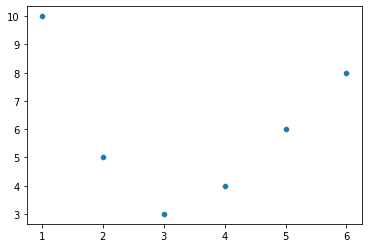

In [ ]:
x = [1, 2, 3, 4, 5 ,6]
y = [10, 5, 3, 4, 6, 8]
sns.scatterplot(x,y);

Você pode notar que o gráfico é extremamente semelhante ao proveniente do matplotlib, o que não é por acaso, visto que o seaborn é baseado no próprio matplotlib.

Vamos importar também outros pacotes padrões

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Scatter (dispersão)
**Documentação**: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


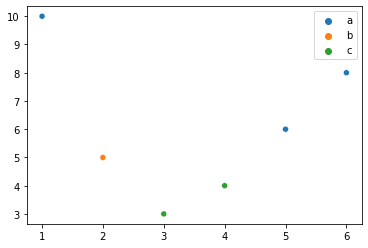

In [ ]:
x = [1, 2, 3, 4, 5 ,6]
y = [10, 5, 3, 4, 6, 8]
z=['a', 'b', 'c', 'c', 'a', 'a']
sns.scatterplot(x,y, hue=z);

Importando o dataset dos pinguins

In [ ]:
#df_size = pd.read_csv('./data/penguins_size.csv')
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


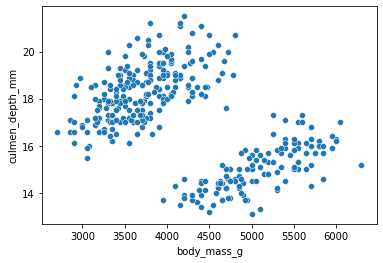

In [ ]:
sns.scatterplot(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm']);

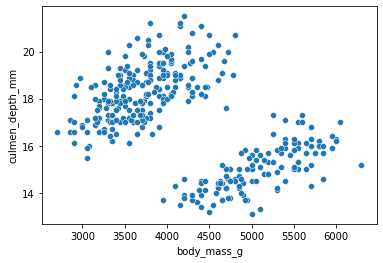

In [ ]:
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm');

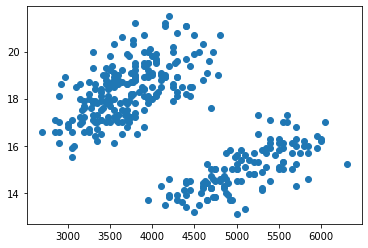

In [ ]:
plt.scatter(data=df_size, x='body_mass_g', y='culmen_depth_mm');

Podemos alterar as cores dos marcadores através de alguma variável do próprio dataframe como por exemplo o sexo dos pinguins.  O parâmetro *hue* é responsável pela mudança das cores na marcação dos pontos por meio de uma das colunas do próprio dataframe.

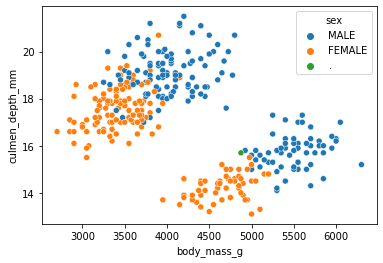

In [ ]:
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm', hue='sex');

Estilizando o gráfico.

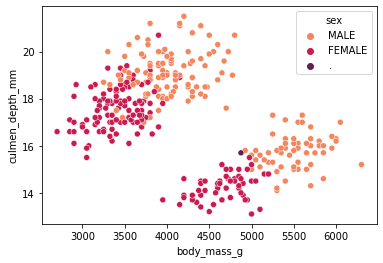

In [ ]:
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm', hue='sex', palette='rocket_r',);

O Seaborn possui uma plotagem semelhante ao scatter, porém feito automaticamente com todas as variáveis contínuas, o **pairplot**

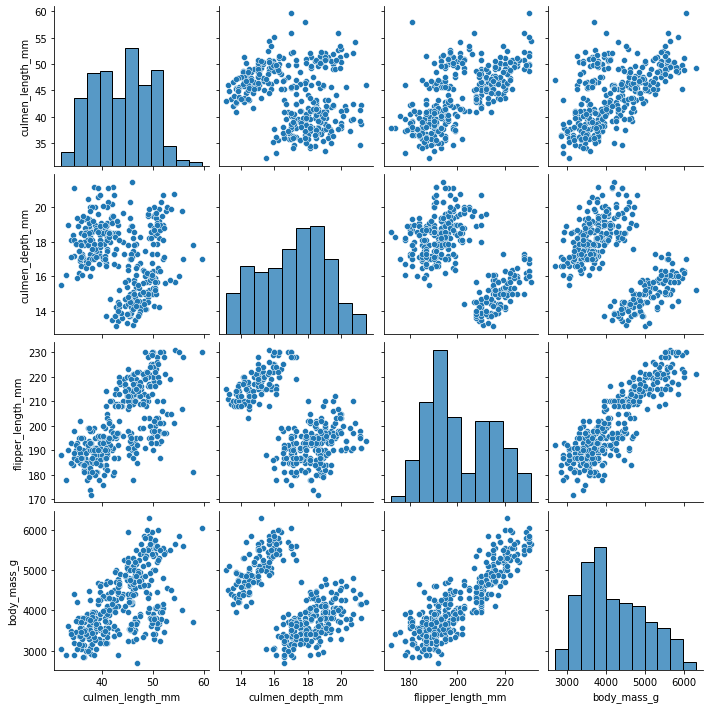

In [ ]:
sns.pairplot(data=df_size);

## Linhas
**Documentação**: https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [ ]:
#df_supermarket = pd.read_csv('.\data\supermarket_sales.csv')
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df_supermarket['Date'] = pd.to_datetime(df_supermarket['Date'])

Na última aula nós tentamos criar um gráfico com o dataframe todo, porém como havia diversos pontos na mesma data, não foi possível visualizar a informação. O Seaborn trata esta questão de forma automática. A linha azul mais escura representa a *média* dos valores dentro do mesmo dia e o sombreado o intervalo com 95% de confiança.

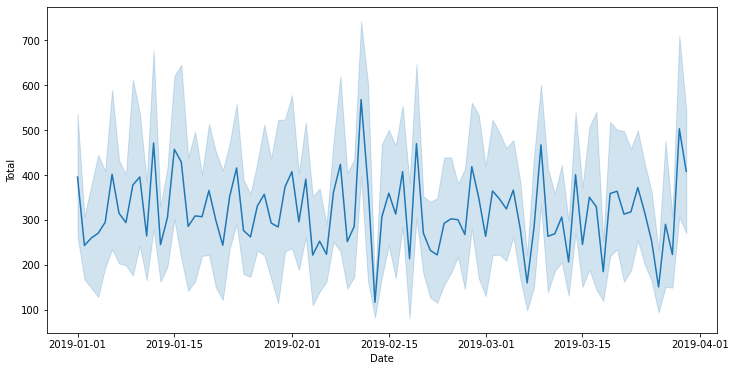

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_supermarket, x='Date', y='Total');

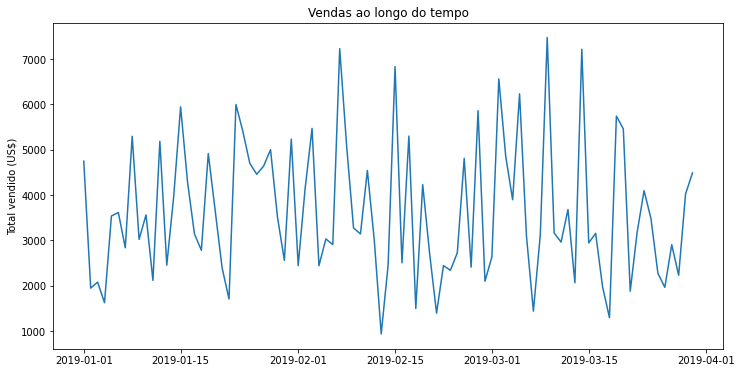

In [ ]:
df_total=df_supermarket.pivot_table(index='Date', values='Total', aggfunc='sum')

plt.figure(figsize=(12,6))

ax = sns.lineplot(x=df_total.index, y=df_total['Total'])

ax.set_title('Vendas ao longo do tempo')
ax.set_ylabel('Total vendido (US$)')
ax.set_xlabel('');

**No mesmo Eixo**

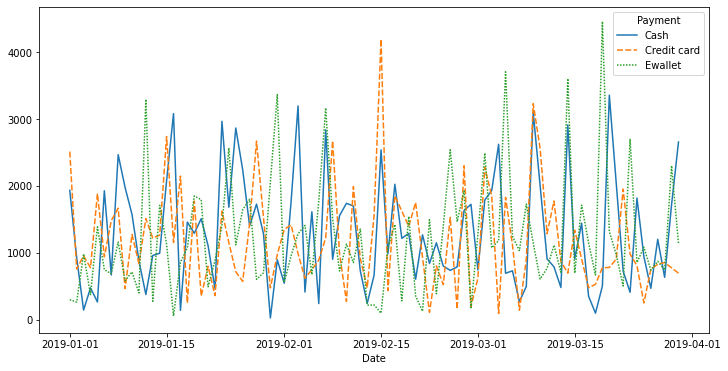

In [ ]:
df_payment=df_supermarket.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')
plt.figure(figsize=(12,6))

sns.lineplot(data=df_payment);

Podemos estilizar o gráfico

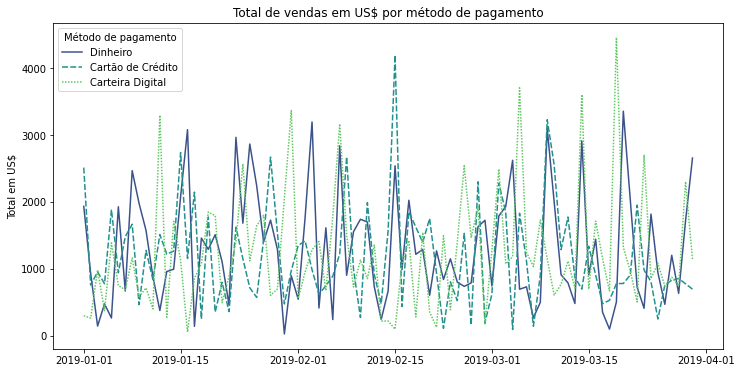

In [ ]:
df_payment=df_supermarket.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')

plt.figure(figsize=(12,6))
ax=sns.lineplot(data=df_payment, palette='viridis')

ax.set_title('Total de vendas em US$ por método de pagamento')
ax.set_xlabel('')
ax.set_ylabel('Total em US$')
ax.legend(['Dinheiro', 'Cartão de Crédito', 'Carteira Digital'], loc='upper left', title='Método de pagamento');

**Em vários eixos**  
Para realizar o plot do gráfico acima, porém agora em três gráficos separados, é possível utilizar o **subplots** do matplotlib e posteriormente passar cada um dos eixos criados para dentro do gráfico do **seaborn** com o parâmetro *ax*.

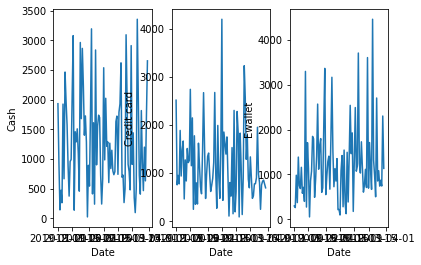

In [ ]:
df_payment.reset_index(inplace=True)

fig, ax = plt.subplots(1, 3)

sns.lineplot(data=df_payment, x='Date', y='Cash', ax=ax[0])
sns.lineplot(data=df_payment, x='Date', y='Credit card', ax=ax[1])
sns.lineplot(data=df_payment, x='Date', y='Ewallet', ax=ax[2]);

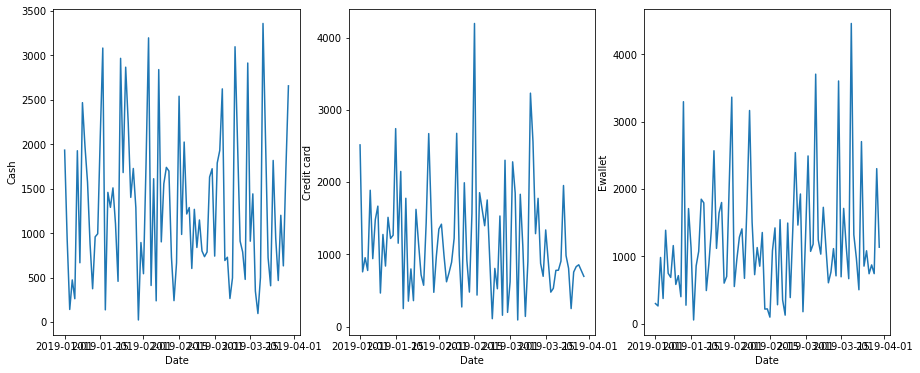

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))

sns.lineplot(data=df_payment, x='Date', y='Cash', ax=ax[0])
sns.lineplot(data=df_payment, x='Date', y='Credit card', ax=ax[1])
sns.lineplot(data=df_payment, x='Date', y='Ewallet', ax=ax[2]);

Perceba que mesmo aumentando a figura não foi possível identificar de forma legível as informações do eixo x (datas), por isso realizar os subplots com 3 linhas e apenas 1 coluna pode tornar o gráfico melhor para leitura.

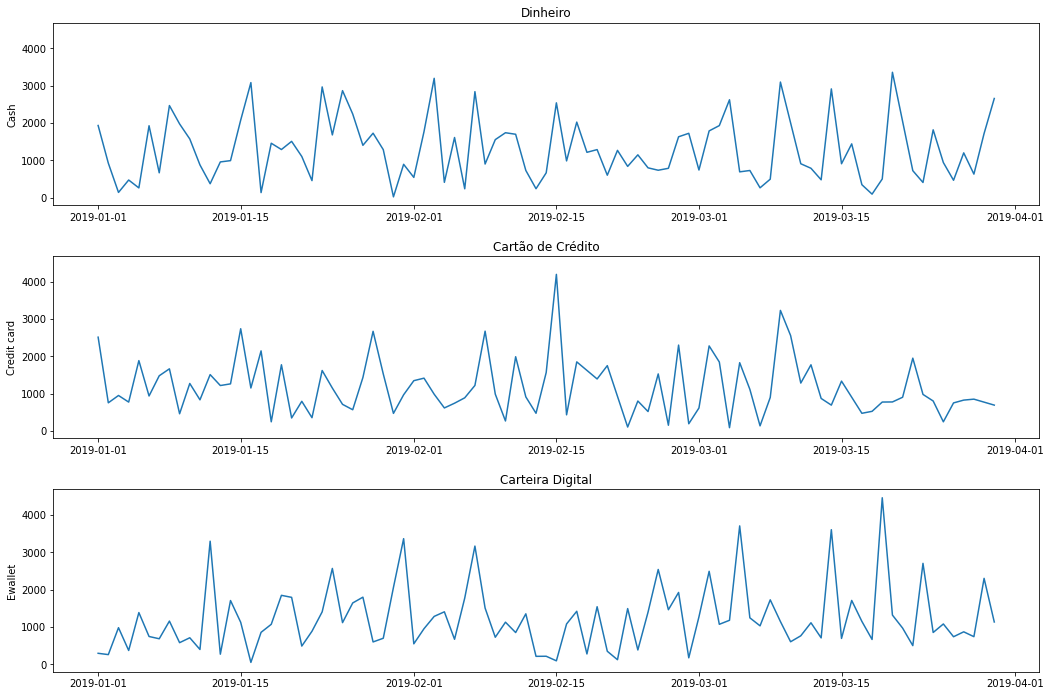

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15,10), sharey=True)

sns.lineplot(data=df_payment, x='Date', y='Cash', ax=ax[0])
sns.lineplot(data=df_payment, x='Date', y='Credit card', ax=ax[1])
sns.lineplot(data=df_payment, x='Date', y='Ewallet', ax=ax[2])

fig.tight_layout(pad=2)
ax[0].set_title('Dinheiro')
ax[1].set_title('Cartão de Crédito')
ax[2].set_title('Carteira Digital')

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('');

## Pizza
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

In [ ]:
df_pizza = df_supermarket.pivot_table(index='Branch', values='Quantity', aggfunc='sum');
df_pizza

,Quantity
Branch,
A,1859
B,1820
C,1831


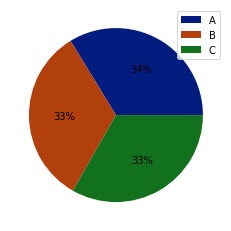

In [ ]:
color=sns.color_palette('dark')
plt.pie('Quantity', data=df_pizza, autopct='%1.0f%%', colors=color)
plt.legend(df_pizza.index);

## Barras
**Documentação**: https://seaborn.pydata.org/generated/seaborn.barplot.html

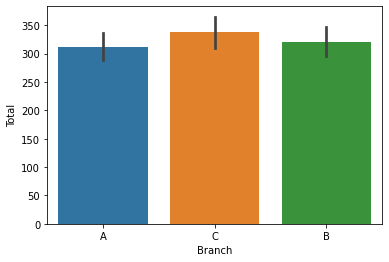

In [ ]:
sns.barplot(data=df_supermarket, x='Branch', y='Total');

AttributeError: ignored

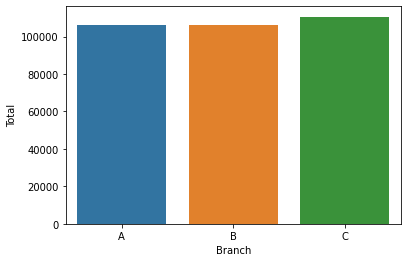

In [ ]:
df_bar_1 = df_supermarket.pivot_table(index='Branch', values='Total', aggfunc='sum')
df_bar_1.reset_index(inplace=True)

ax=sns.barplot(data=df_bar_1, x='Branch', y='Total')

ax.bar_label(ax.containers[0]);

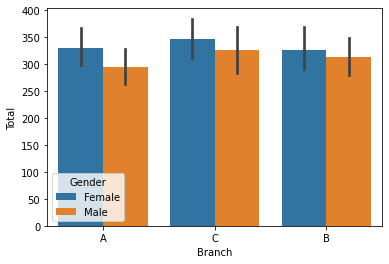

In [ ]:
sns.barplot(data=df_supermarket, x='Branch', y='Total', hue='Gender');

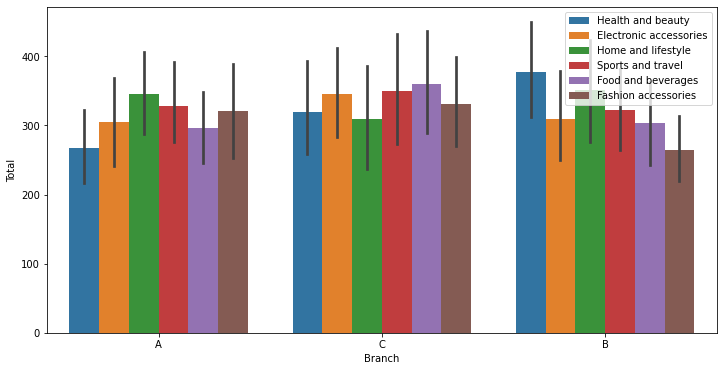

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_supermarket, x='Branch', y='Total', hue='Product line')

plt.legend(loc='upper right');

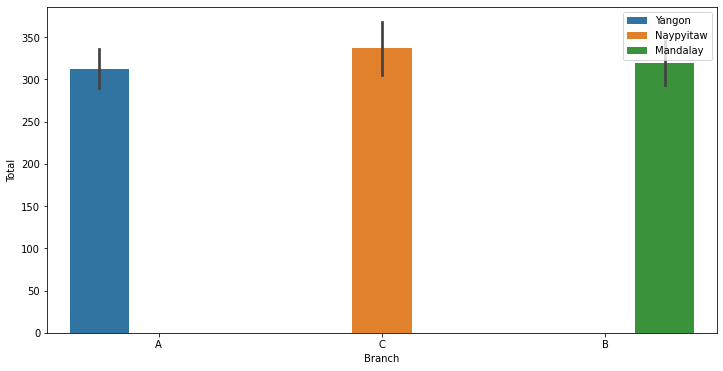

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_supermarket, x='Branch', y='Total', hue='City')

plt.legend(loc='upper right');

**Barras Horizontais**
Para criar o gráfico de barras horizontais basta alterar a ordem dos parâmetros *x* e *y*.

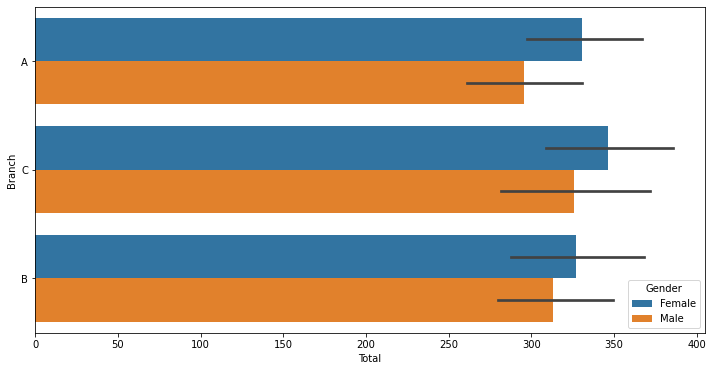

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_supermarket, y='Branch', x='Total', hue='Gender');

## Histograma
**Documentação**: https://seaborn.pydata.org/generated/seaborn.histplot.html

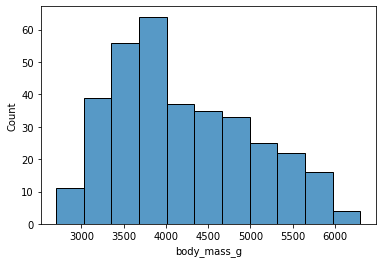

In [ ]:
sns.histplot(data=df_size, x='body_mass_g');

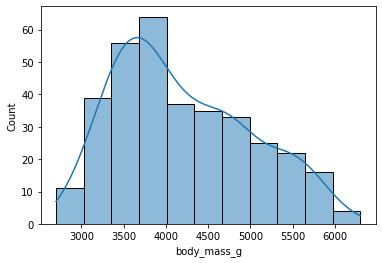

In [ ]:
sns.histplot(data=df_size, x='body_mass_g', kde=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


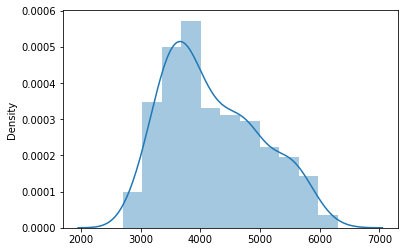

In [ ]:
sns.distplot(x=df_size['body_mass_g']);

## Boxplot
**Documentação**: https://seaborn.pydata.org/generated/seaborn.boxplot.html

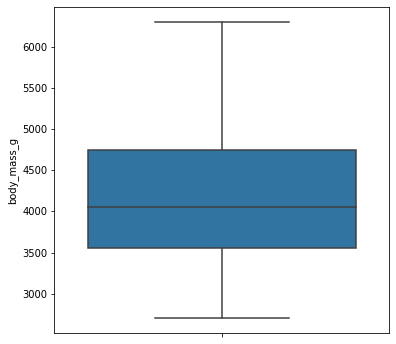

In [ ]:
plt.figure(figsize=(6,6))

sns.boxplot(data=df_size, y='body_mass_g');

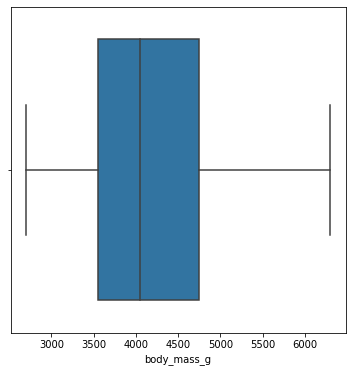

In [ ]:
plt.figure(figsize=(6,6))

sns.boxplot(data=df_size, x='body_mass_g');

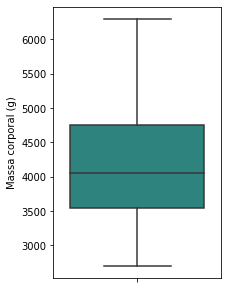

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(data=df_size, y='body_mass_g', palette='viridis')

plt.ylabel('Massa corporal (g)');

## Heatmap
**Documentação**: https://seaborn.pydata.org/generated/seaborn.heatmap.html

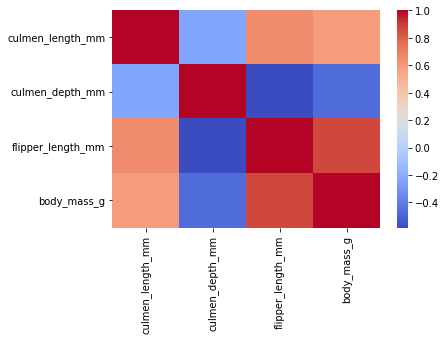

In [ ]:
sns.heatmap(df_size.corr(), cmap='coolwarm');

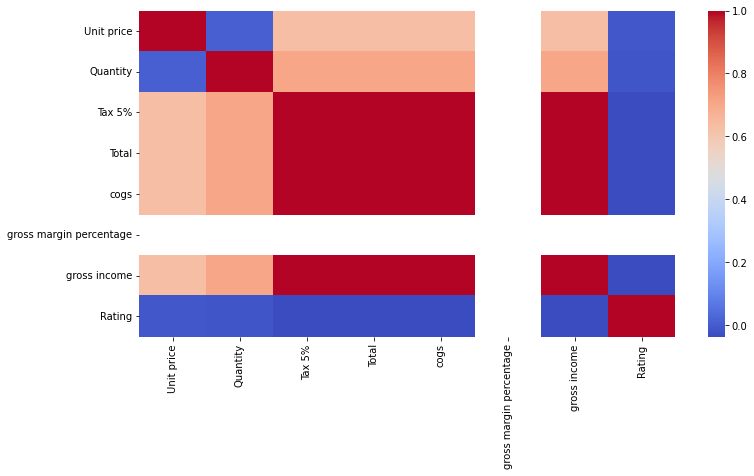

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_supermarket.corr(), cmap='coolwarm');

## Exercício
Agora é hora de praticar!  
  
O conjunto de dados foi baixado da UCI Machine Learning Repository.

Originalmente existiam dois dataframes relacionados com variantes tinto e branco do vinho português "Vinho Verde". Porém para a nossa prática apenas aquele referente aos vinhos brancos será utilizado. Por questões de privacidade e logística, apenas variáveis físico-químicas (entradas) e sensoriais (saídas) estão disponíveis (por exemplo, não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.).
  
  
Metadados:
  
Variáveis de entrada (físico-químicos):  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
  
Variável resposta (Sensorial):  
12 - quality (score between 0 and 10)

Importe a base **winequality-white.csv** que está em csv dentro do diretório **data**.

In [ ]:
df_wine = import_drive_file(link="https://drive.google.com/open?id=1h-OkRGSs6GN8CU3k3bhEfKe8J8NKxflr", sep=";")

1h-OkRGSs6GN8CU3k3bhEfKe8J8NKxflr


Verifique com a função **.info** os campos presentes na tabela

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Imprima as estatísticas padrões do dataframe com a função **.describe**

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 1) Verifique a distribuição da variável resposta para este problema (quality)

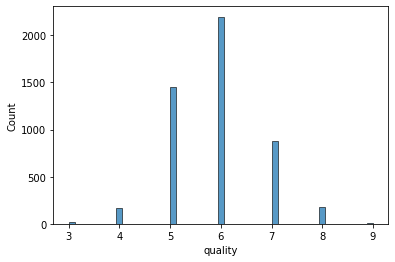

In [ ]:
sns.histplot(data=df_wine, x='quality');

In [ ]:
sns.countplot(x='quality', data=df_vinhos);

### 2) Verifique se há outliers nas variáveis

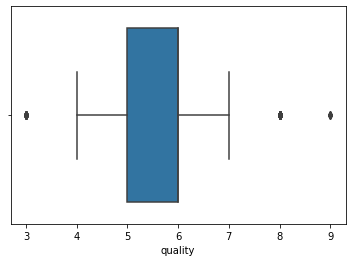

In [ ]:
sns.boxplot(data=df_wine, x='quality');

In [ ]:
def take_off_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

def get_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] < lower_boundary) | (dataframe[column] > upper_boundary)]
    return df_new    

In [ ]:
df_without_outliers = take_off_outliers(df_wine, "quality")

df_just_outliers = get_outliers(df_wine, "quality")

In [ ]:
sns.boxplot(x='quality', y='volatile acidity', data=df_wine);

In [ ]:
fig, ax = plt.subplots(nrows=len(df_wine.columns), figsize=(8, len(df_wine.columns)*2))
for i, column in enumerate(df_wine.columns):
    sns.boxplot(data=df_wine, x=column, ax=ax[i], orient='h')
plt.tight_layout(pad=2)

In [ ]:
colunas_numericas = [['fixed acidity','volatile acidity','citric acid','residual sugar'],
                    ['chlorides','free sulfur dioxide','total sulfur dioxide','density'],
                    ['pH','sulphates','alcohol','quality']]

sns.set(font_scale=1.2)
fig, eixo = plt.subplots(3,4,figsize=(20,12))

for linha in range(3):
    for coluna in range(4): 
        if colunas_numericas[linha][coluna] != '':
            sns.boxplot(data=df_wine,x=colunas_numericas[linha][coluna],ax=eixo[linha][coluna])

In [ ]:
sns.violinplot(x ='quality',
               y ='fixed acidity', #'density',
               data=df_wine)

Existe 200 registros que são considerados outliers pela variável **quality**

### 3) Construa um gráfico que permita verificar se há relação entre cada uma das variáveis retirando a qualidade dos vinhos (quality)

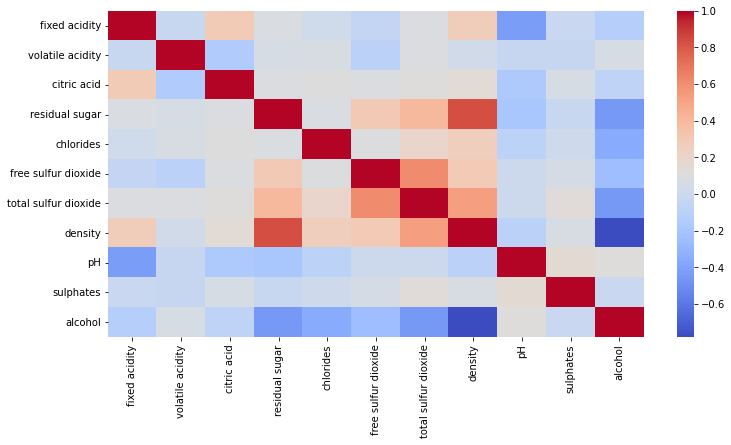

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_wine.loc[:, df_wine.columns != 'quality'].corr(), cmap='coolwarm');

In [ ]:
sns.heatmap(df_wine.drop("quality", axis=1).corr());

### 4) Dê um "zoom" na relação entre as características de densidade e açúcar residual, visto que aparentam ter alta relação. Insira também neste gráfico a variável de qualidade, a fim de verificar se há grupos claramente separados por estas duas características.

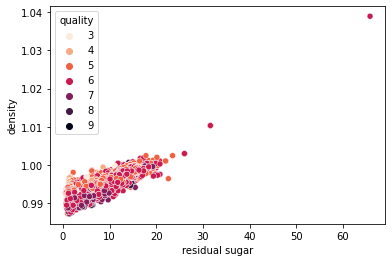

In [ ]:
sns.scatterplot(data=df_wine, x='residual sugar', y='density', hue='quality', palette='rocket_r',);

In [ ]:
sns.scatterplot(data=df_wine, x='density', y='residual sugar', hue='quality')

plt.ylim(0, 30)
plt.xlim(0.985, 1.01);

In [ ]:
sns.lmplot(x='density', y='residual sugar', data=df_wine, hue='quality', fit_reg=True);

### 5) Baseado no gráfico acima, foi possíve identificar uma relação forte entre as variáveis density e residual sugar. Construa gráficos de barras para verificar a relação da média de cada uma destas características com a qualidade do vinho.

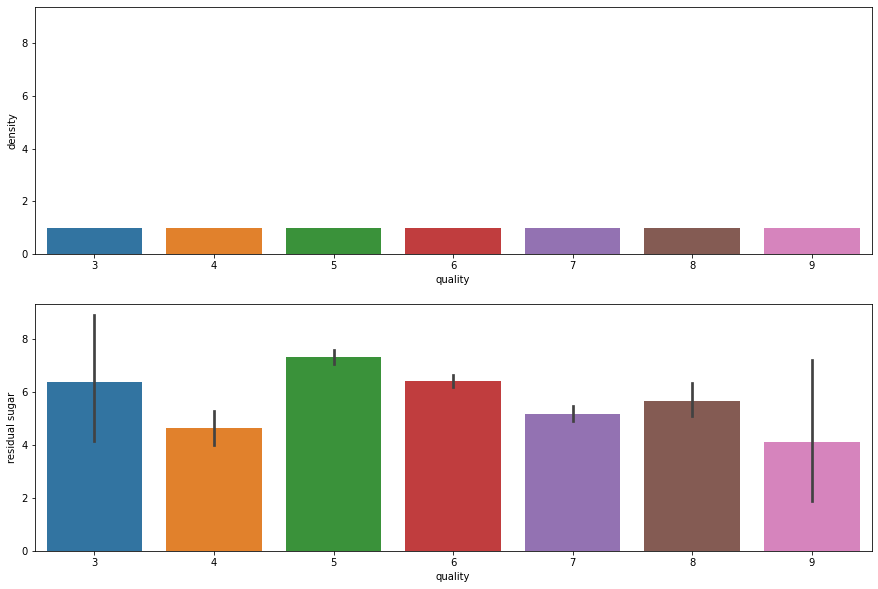

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharey=True)

sns.barplot(data=df_wine, x='quality', y='density', ax=ax[0])
sns.barplot(data=df_wine, x='quality', y='residual sugar', ax=ax[1])

fig.tight_layout(pad=1)
ax[0].set_xlabel('quality')
ax[1].set_xlabel('quality');

### 6) Construa gráficos de relação entre todas as variáveis, porém agora insira a variável de qualidade a fim de verificar se é possível separar os grupos.  
Obs.: utilize o pairplot

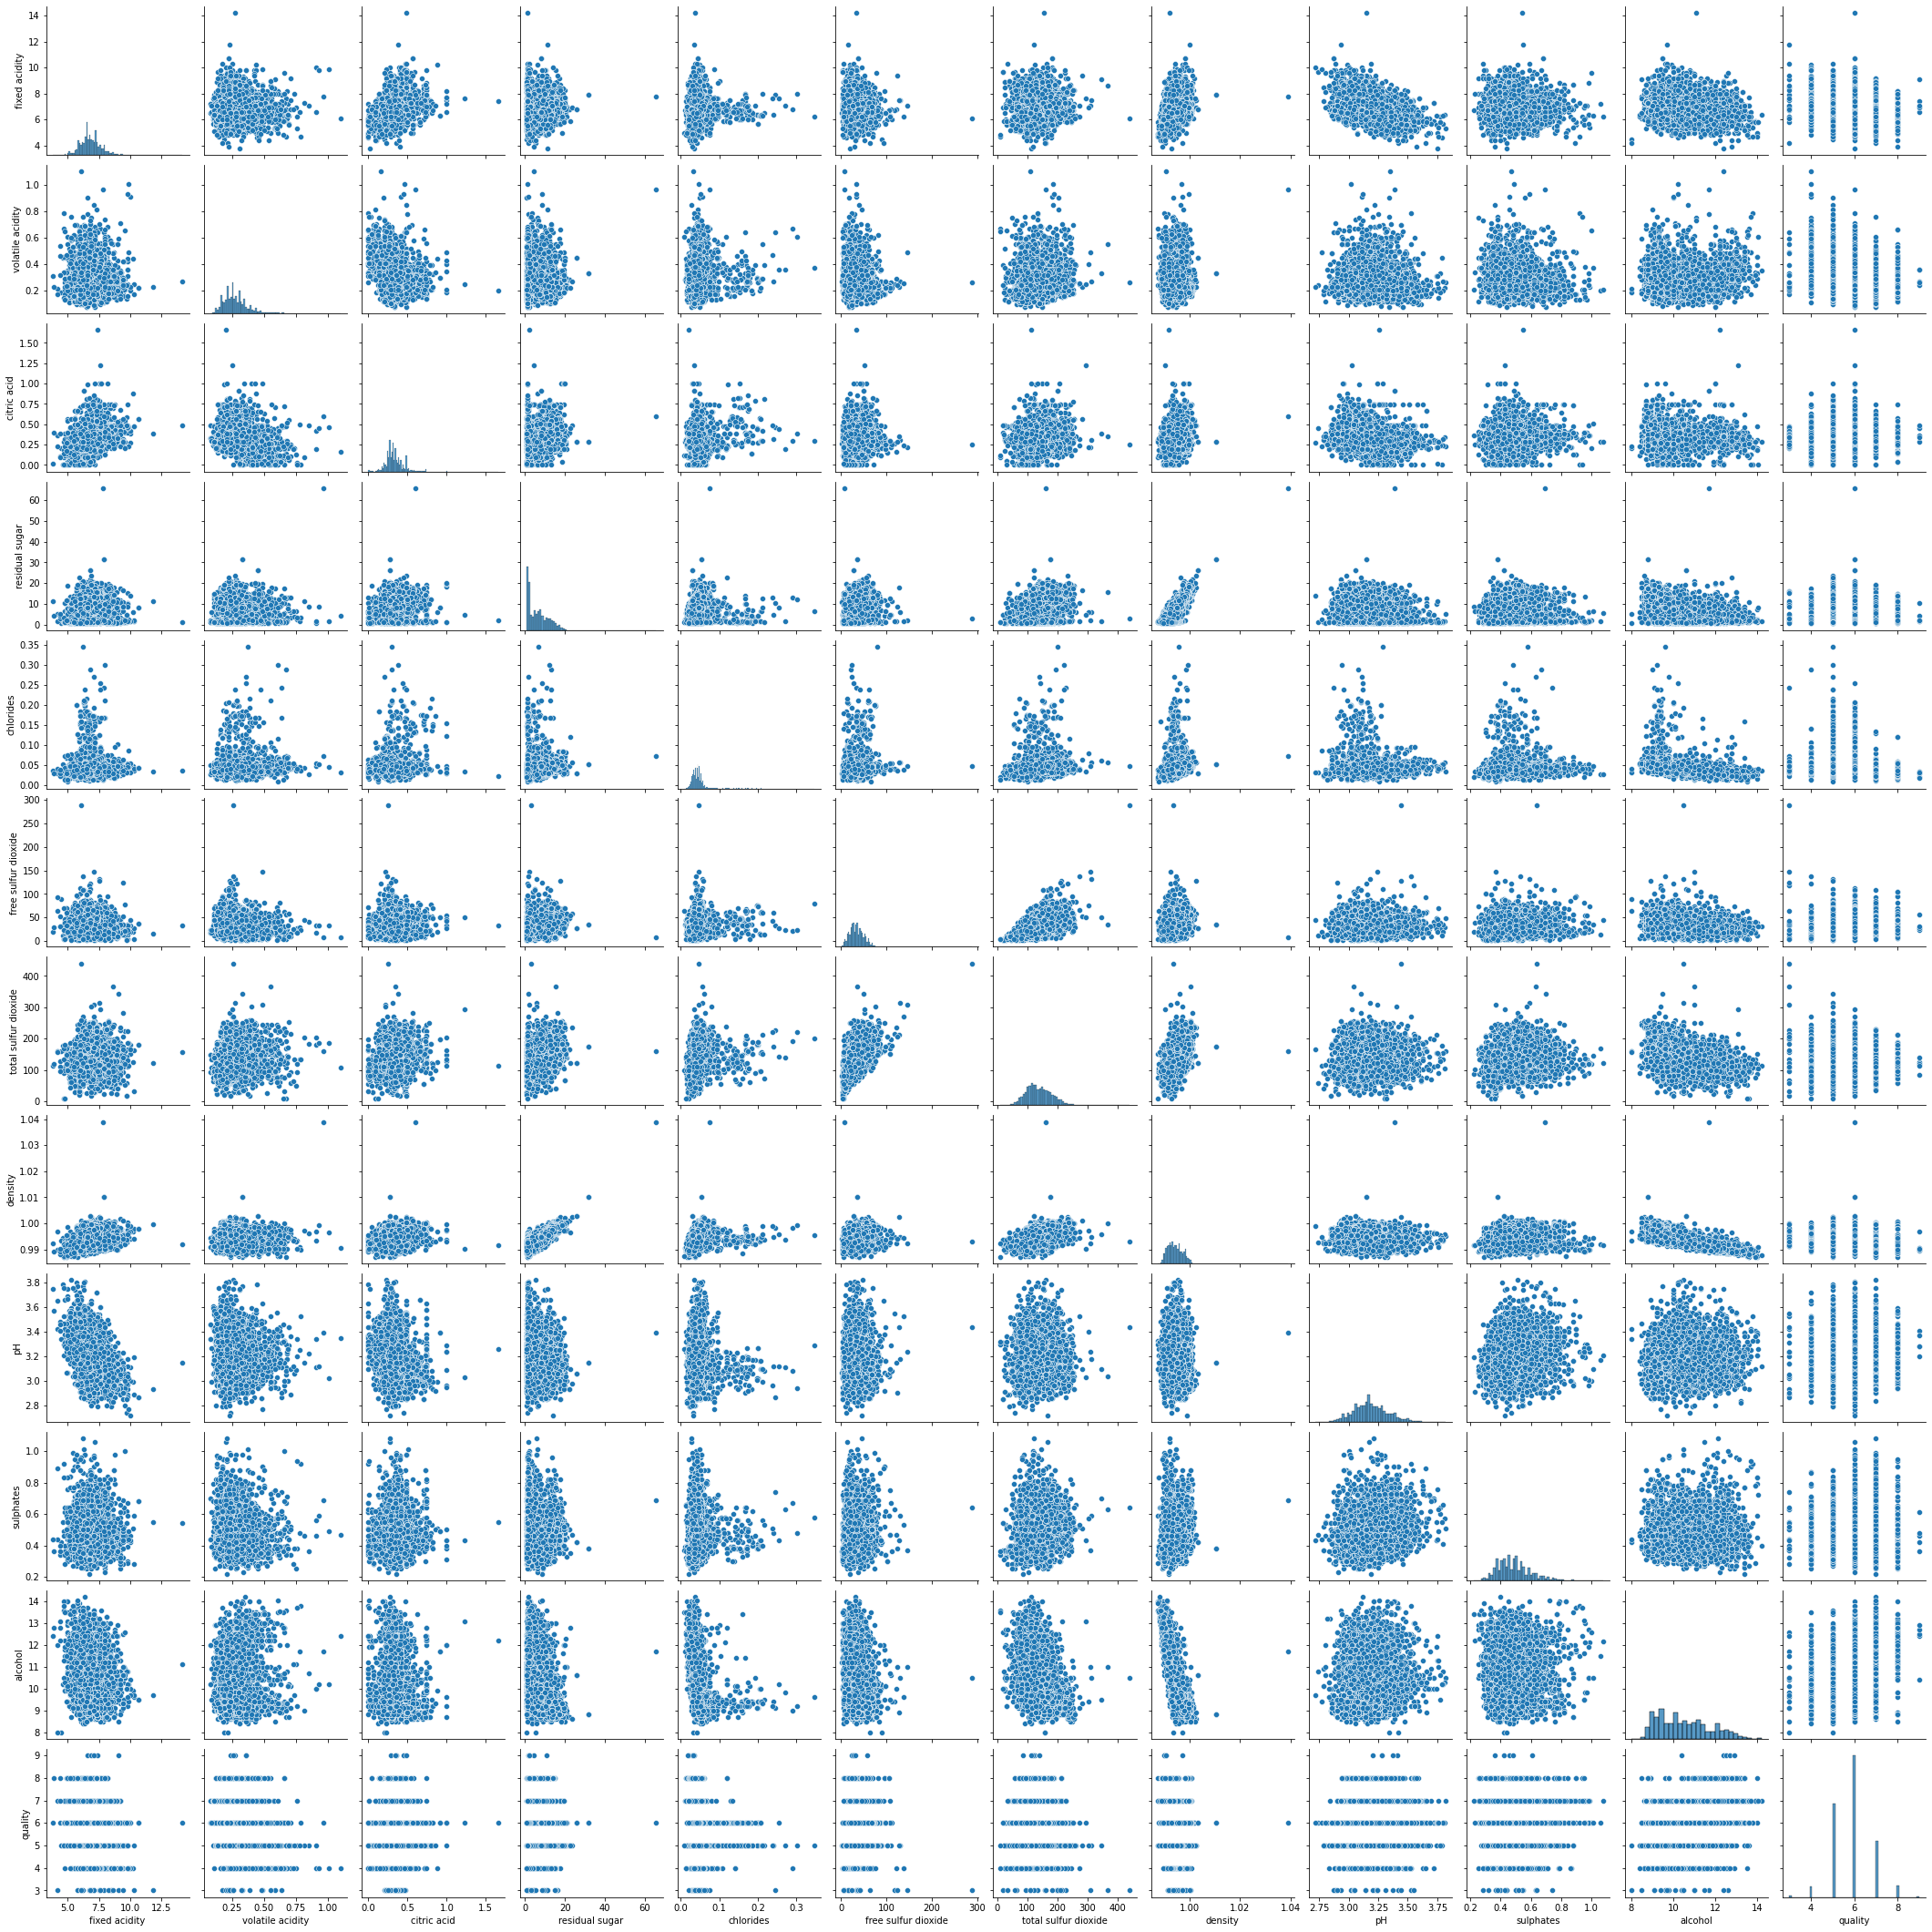

In [ ]:
sns.pairplot(data=df_wine);

In [ ]:
sns.pairplot(data=df_wine, hue='quality', palette='rocket_r');
plt.legend(bbox_to_anchor=(1,1.01));